# **จะให้กู้ดีไหม?**


## Problem Statement:

> บริษัทปล่อยสินเชื่อแห่งหนึ่ง ดำเนินธุรกิจเกี่ยวกับสินเชื่อที่อยู่อาศัยทุกประเภท พวกเขามีการให้บริการในเขตเมือง เขตชานเมือง และชนบท ลูกค้าจะต้องสมัครขอสินเชื่อที่อยู่อาศัยก่อน จากนั้นบริษัทจะทำการตรวจสอบคุณสมบัติของลูกค้าว่ามีสิทธิ์ได้รับสินเชื่อหรือไม่

> ทางบริษัทต้องการทำให้กระบวนการตรวจสอบคุณสมบัติการขอสินเชื่อเป็นไปโดยอัตโนมัติ (แบบเรียลไทม์) โดยพิจารณาจากข้อมูลของลูกค้าที่ให้มาในขณะกรอกแบบฟอร์มสมัครออนไลน์ ข้อมูลเหล่านี้ได้แก่ เพศ สถานภาพการสมรส การศึกษา จำนวนผู้อยู่ในอุปการะ รายได้ จำนวนเงินกู้ ประวัติทางการเงิน และข้อมูลอื่น ๆ เพื่อให้กระบวนการนี้เป็นไปโดยอัตโนมัติ บริษัทจึงมีโจทย์ให้ระบุกลุ่มลูกค้าที่มีคุณสมบัติสำหรับการขอสินเชื่อ เพื่อที่พวกเขาจะได้สามารถมุ่งเน้นกลุ่มลูกค้าเหล่านี้ได้อย่างเฉพาะเจาะจง โดยทางบริษัทได้จัดเตรียมชุดข้อมูลบางส่วนมาให้



## Data

Variable | Description
----------|--------------
Loan_ID | เลขที่ใบสมัครขอสินเชื้อ
Gender | เพศ (Male/ Female)
Married | สถานภาพการแต่งงาน (Y/N)
Dependents | จำนวนผู้อยู่ในความอุปการะ
Education | การศึกษาของผู้สมัคร (Graduate/ Under Graduate)
Self_Employed | ประกอบอาชีพอิสระ (Y/N)
ApplicantIncome | รายได้ของผู้สมัคร
CoapplicantIncome | รายได้ผู้สมัครร่วม
LoanAmount | จำนวนเงินกู้ (x1000)
Loan_Amount_Term | ระยะเวลาการกู้ยืม (เดือน)
Credit_History | ประวัติเครดิตตรงตามเกณฑ์
Property_Area | บริเวณที่ตั้งทรัพย์สิน (Urban/ Semi Urban/ Rural)
Loan_Status | สถานะการอนุมัติสินเชื่อ (Y/N)


# **[1.] Data Collection and Preprocessing:**
- **Gather historical loan data**, which should include both approved and denied loans.
- **Clean and preprocess the data** by handling missing values.

## Gather historical loan data

In [402]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [403]:
#https://drive.google.com/file/d/1qkgJL3XMlt_n0sw_SeMlZ7TZLn0wZF7o/view?usp=sharing
!gdown --id 1qkgJL3XMlt_n0sw_SeMlZ7TZLn0wZF7o

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [404]:
df = pd.read_csv('Data-Loan_Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [406]:
data = df.copy()

## Clean and preprocess the data

In [407]:
#Remove identity data
data.drop(['Loan_ID'], inplace=True, axis=1)


In [408]:
#Checking the data types of columns
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [409]:
#Checking the missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## fill the missing values

Before filling missing values in categorical columns, let’s have a look at the distribution of the dataset

In [410]:
#Distribution of categorical columns
cat_cols = data.select_dtypes('object').columns.values
for col in cat_cols:
    print(data[col].value_counts())
    print('-'*20)


Gender
Male      489
Female    112
Name: count, dtype: int64
--------------------
Married
Yes    398
No     213
Name: count, dtype: int64
--------------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
--------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
--------------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
--------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
--------------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64
--------------------


Fill the missing values in categorical columns.

In [411]:
#Fill the missing values in categorical columns.
cat_cols = data.select_dtypes('object').columns.values
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


Before filling missing values in numerical columns, let’s have a look at the descriptive statistics of the dataset

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

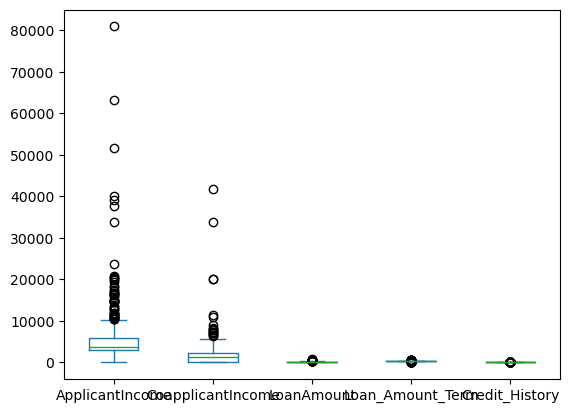

In [412]:
#Descriptive statistics of the numerical columns
num_cols = data.select_dtypes('number').columns.values
data[num_cols].plot.box()
df[num_cols].isna().sum()


Fill missing values in numerical columns

In [413]:
# Fill missing values in numerical columns
data['LoanAmount'].fillna(data['ApplicantIncome'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['ApplicantIncome'].mean(),inplace=True)
data['Credit_History'].fillna(data['ApplicantIncome'].mode()[0],inplace=True)

In [414]:
#Checking the missing values
data.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **[2.] Data Exploration and Visualization:**

- **Examine the distribution of the target variable**, which is typically whether a loan was approved or denied. Creating a bar plot or pie chart to visualize the distribution etc.
- **Explore the distribution of individual features**, both numerical and categorical. Use histograms, box plots, or bar charts to visualize the data. Identify outliers using box plots.

Link:
*   https://plotly.com/python-api-reference/
*   https://seaborn.pydata.org/api.html




In [415]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution of the `Loan Status`





In [416]:
fig_loan_status = px.histogram(data_frame = data,
                               x = 'Loan_Status',
                               title = 'Loan Status Distribution')
fig_loan_status.show()

### Distribution of `Gender`

In [417]:
fig_gender_status = px.histogram(data_frame = data,
                               x = 'Gender',
                               color = 'Gender',
                               title = 'Gender Distribution')
fig_gender_status.show()

### Distribution of the `Martial Status`

In [418]:
fig_Married_status = px.histogram(data_frame = data,
                               x = 'Married',
                               color = 'Married',
                               title = 'Married Distribution')
fig_Married_status.show()

### Distribution of the `Self-employment`

In [419]:
fig_Self_Employed_status = px.histogram(data_frame = data,
                               x = 'Self_Employed',
                               color = 'Self_Employed',
                               title = 'Self_Employed Distribution')
fig_Self_Employed_status.show()

### Distribution of the `Education`

In [420]:
fig_Education_status = px.histogram(data_frame = data,
                               x = 'Education',
                               color = 'Education',
                               title = 'Education Distribution')
fig_Education_status.show()

### Distribution of the `Applicant Income`

In [421]:
fig_ApplicantIncome_status = px.histogram(data_frame = data,
                               x = 'ApplicantIncome',
                               title = 'ApplicantIncome Distribution')
fig_ApplicantIncome_status.show()

### Distribution of `Coapplicant Income`

In [422]:
fig_CoapplicantIncome_status = px.histogram(data_frame = data,
                               x = 'CoapplicantIncome',
                               title = 'CoapplicantIncome Distribution')
fig_CoapplicantIncome_status.show()

### Distribution of the `Loan Amount`

In [423]:
fig_LoanAmount_status = px.histogram(data_frame = data,
                               x = 'LoanAmount',
                               title = 'LoanAmount Distribution')
fig_LoanAmount_status.show()

### `Applicant Income` VS `Loan Amount`

In [424]:
fid_applicant_income_Loan_amount = px.scatter(
    data_frame=data,
    x='ApplicantIncome',
    y='LoanAmount',
    title='Applicant Income VS Loan Amount'
)
fid_applicant_income_Loan_amount.show()

### `Married` VS `Applicant Income`

In [425]:
fid_applicant_income_Married = px.scatter(
    data_frame=data,
    x='Married',
    y='ApplicantIncome',
    title='Applicant Income VS Married'
)
fid_applicant_income_Married.show()

### `Applicant Income` VS `Education`

In [426]:
fid_applicant_income_Education = px.scatter(
    data_frame=data,
    x='ApplicantIncome',
    y='Education',
    title='Applicant Income VS Education'
)
fid_applicant_income_Education.show()

### `Credit History` VS `Loan Status`

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

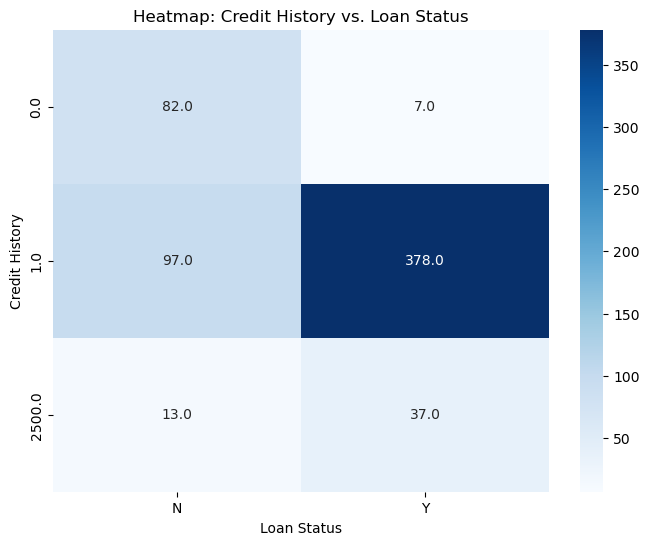

In [427]:
data['Credit_History'] = pd.to_numeric(data['Credit_History'], errors='coerce')
cross_tab = pd.crosstab(data['Credit_History'], data['Loan_Status'])

plt.figure(figsize=(8,6))
sns.heatmap(data=cross_tab,
            annot=True,
            cmap='Blues',
            fmt=".1f")
plt.xlabel('Loan Status')
plt.ylabel("Credit History")
plt.title('Heatmap: Credit History vs. Loan Status')
plt.show()


### `Loan_Status` VS `Property_Area`

<Axes: xlabel='Property_Area,Loan_Status'>

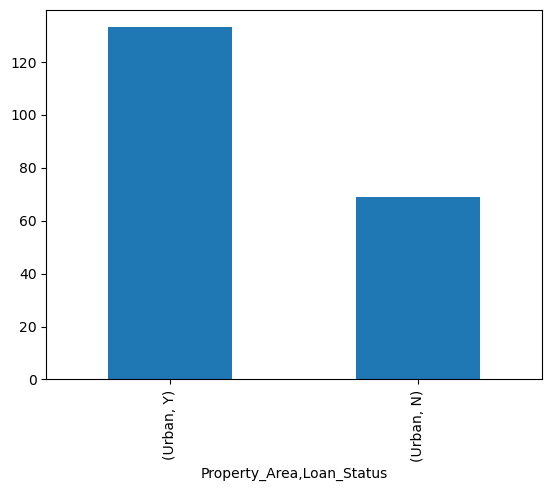

In [428]:
data[['Property_Area', 'Loan_Status']][data['Property_Area'] == 'Urban'].value_counts().plot.bar()


## Pair Plots by `Loan Status`

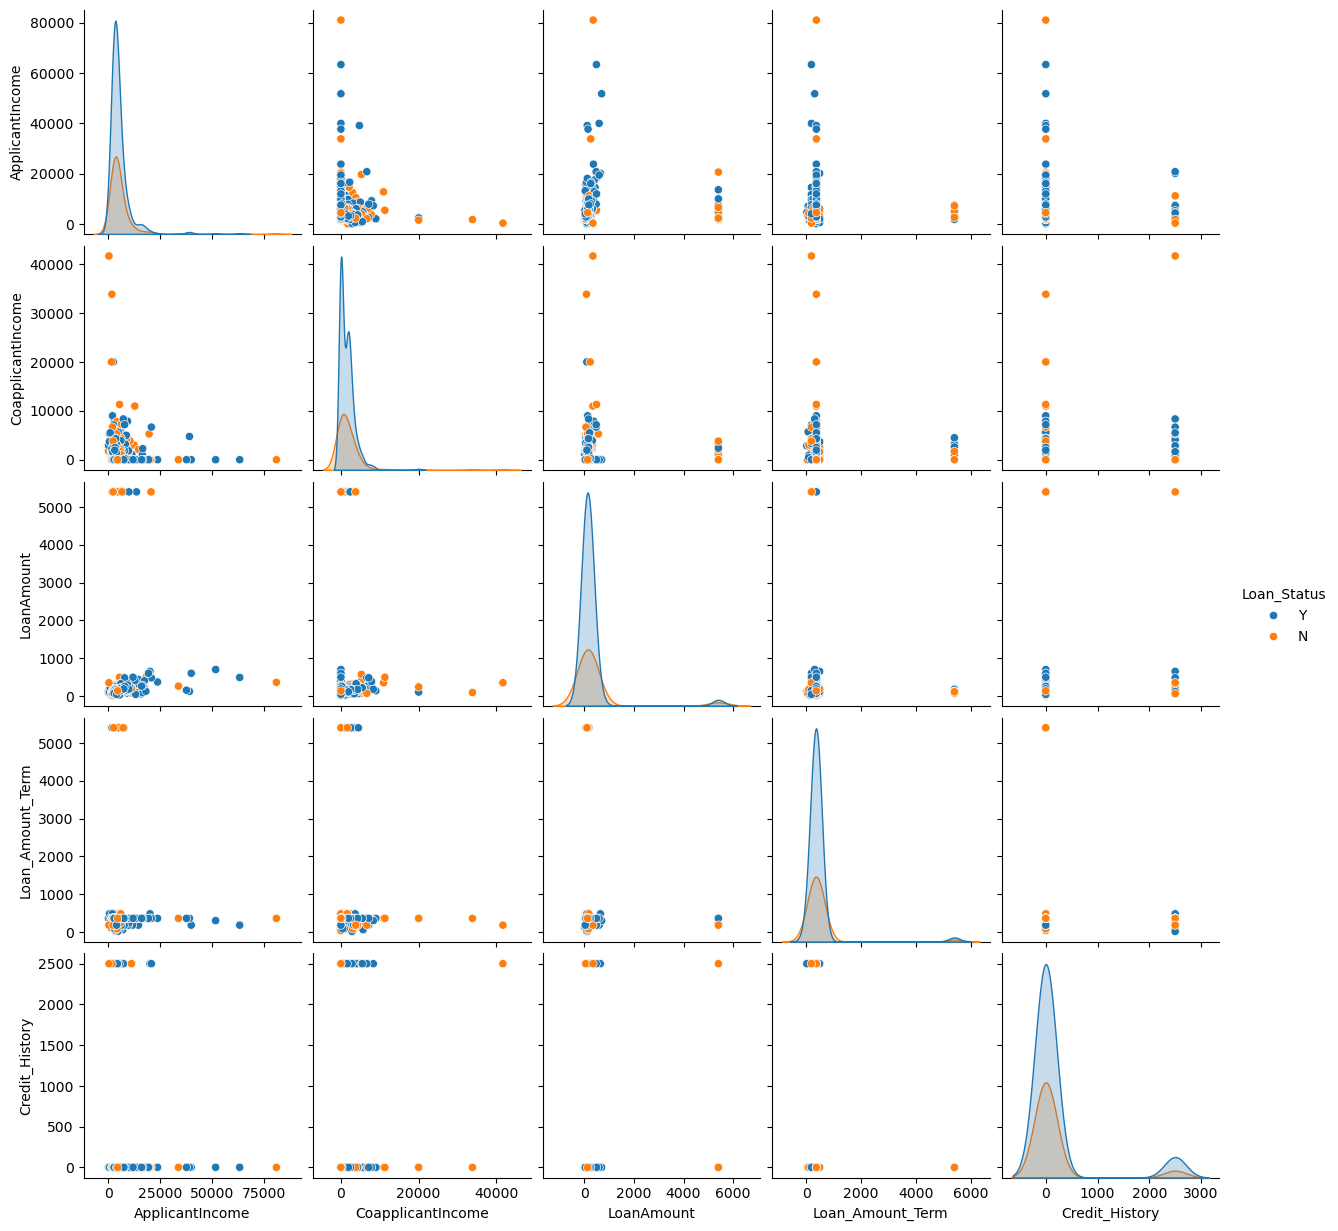

In [430]:
sns.pairplot(data, hue='Loan_Status')
plt.show()

### *Detect outliers and remove*

#### `Loan Status` vs `Applicant Income`

In [431]:
fig_income = px.box(data_frame=df,
                    x='Loan_Status',
                    y='ApplicantIncome',
                    color="Loan_Status",
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [466]:
data.shape

(614, 12)

In [467]:
# The “ApplicantIncome” column contains outliers which need to be removed before moving further. Here’s how to remove the outliers:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers
df_filtered = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]

In [468]:
df_filtered.shape

(564, 12)

#### `Loan Status` vs `Coapplicant Income`

In [449]:
fig_coapplicant_income = px.box(data_frame=df_filtered,
                                x='Loan_Status',
                                y='CoapplicantIncome',
                                color="Loan_Status",
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [469]:
# The income of the loan co-applicant also contains outliers. Let’s remove the outliers from this column as well:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)


# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df_filtered[(data['CoapplicantIncome'] >= lower_bound) & (df_filtered['CoapplicantIncome'] <= upper_bound)]


In [470]:
df_filtered.shape

(548, 12)

## Relationship between the `Property Area` and the `Loan Status`

In [453]:
fig_property_area = px.histogram(df_filtered, x='Property_Area', color='Loan_Status',
                                 barmode='group',

                                title='Loan_Status vs Property_Area')

fig_property_area.show()

## Relationship between `Credit History` and `Loan Status`

In [454]:
fig_credit_history = px.histogram(data_frame=df,
                                  x='Credit_History',
                                  color='Loan_Status',
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')

fig_credit_history.show()

# **[3.] Data Preparation**
- **Prepare the data** by encoding categorical variables, and scaling/normalizing numerical features.
- **Split your data into training and testing sets** to evaluate your model's performance.

In [496]:
#Convert categorical Columns into numerical ones
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
################################ df_preprocess = df_filtered.copy()
df_preprocess = df_filtered.copy()

for col in cat_cols:
    df_preprocess[col] = le.fit_transform(df_preprocess[col])

In [497]:
# Scale the numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_preprocess[num_cols] = scaler.fit_transform(df_preprocess[num_cols])


In [498]:
df_preprocess.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.902588,-0.933096,5.131133,-0.139651,-0.298875,2,1
1,1,1,1,0,0,0.238250,0.101980,-0.196984,-0.139651,-0.298875,0,0
2,1,1,0,0,1,-0.592435,-0.933096,-0.259602,-0.139651,-0.298875,2,1
3,1,1,0,1,0,-0.811258,0.685412,-0.205063,-0.139651,-0.298875,2,1
4,1,0,0,0,0,0.981826,-0.933096,-0.183854,-0.139651,-0.298875,2,1
5,1,1,2,0,1,0.675894,1.946997,-0.056596,-0.139651,-0.298875,2,1
6,1,1,0,1,0,-0.942446,0.107472,-0.230313,-0.139651,-0.298875,2,1
7,1,1,3,0,0,-0.573544,0.785625,-0.166684,-0.139651,-0.300333,1,0
8,1,1,2,0,0,-0.064533,0.114335,-0.156584,-0.139651,-0.298875,2,1
10,1,1,2,0,0,-0.487485,-0.452623,-0.255563,-0.139651,-0.298875,2,1


In [499]:
df_preprocess.shape

(548, 12)

In [505]:
# Split the dataset into features (X) and target (y)

from sklearn.model_selection import train_test_split

X = df_preprocess.drop('Loan_Status', axis=1)
y = df_preprocess['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

# **[4.] Model Building and Evaluation**

- **Train** your chosen model on the training data.
- **Evaluate** the model's performance using appropriate metrics, such as accuracy, precision, recall, F1-score. It's important to consider the specific requirements and constraints of  application.

In [506]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [507]:
#LogisticRegression()
log_model_lr = LogisticRegression()
log_model_lr.fit(X_train, y_train)
y_pred_log = log_model_lr.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

#RandomForestClassifier()
log_model = RandomForestClassifier()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nRandomForestClassifier:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

#SVC()
log_model = SVC()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nSVC:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")

#XGBClassifier()
log_model = XGBClassifier()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nXGBClassifier:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")





Logistic Regression:
Accuracy: 0.6545454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.02      0.03        54
           1       0.67      0.96      0.79       111

    accuracy                           0.65       165
   macro avg       0.43      0.49      0.41       165
weighted avg       0.52      0.65      0.54       165

Confusion Matrix:
 [[  1  53]
 [  4 107]]



RandomForestClassifier:
Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.65        54
           1       0.80      0.96      0.88       111

    accuracy                           0.82       165
   macro avg       0.84      0.74      0.76       165
weighted avg       0.83      0.82      0.80       165

Confusion Matrix:
 [[ 28  26]
 [  4 107]]



SVC:
Accuracy: 0.6727272727272727
Classification Report:
               precision    recall  f1-score   

##Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Self_Employed'),
  Text(2, 0, 'CoapplicantIncome'),
  Text(3, 0, 'Property_Area'),
  Text(4, 0, 'Gender'),
  Text(5, 0, 'Dependents'),
  Text(6, 0, 'Credit_History'),
  Text(7, 0, 'Loan_Amount_Term'),
  Text(8, 0, 'ApplicantIncome'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'LoanAmount')])

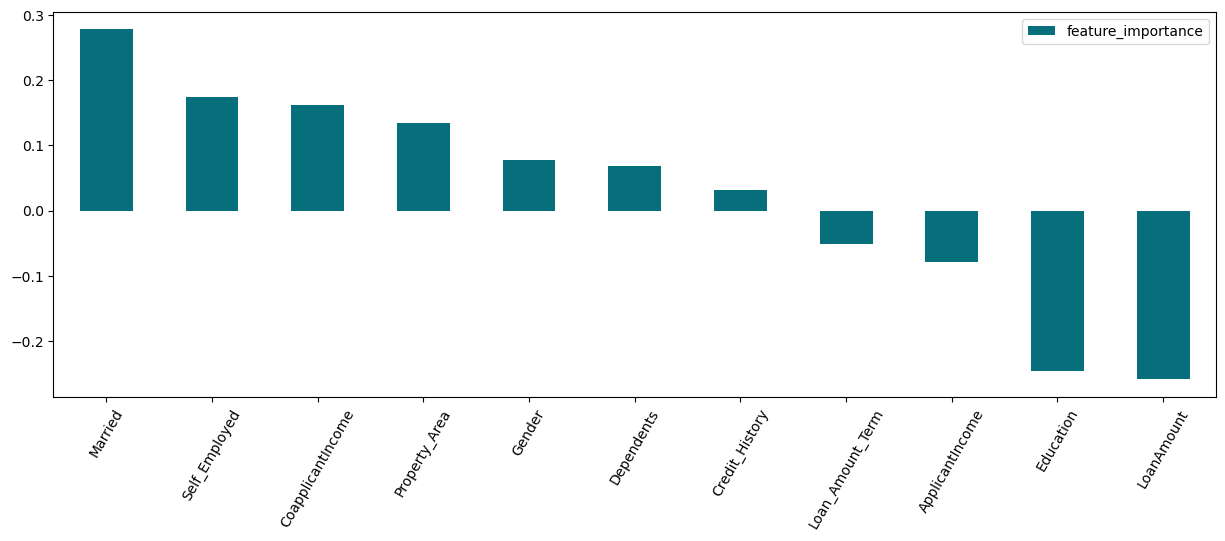

In [508]:
#LogisticRegression() >> feature_importance
feat_imp_logistic = pd.DataFrame(data = log_model_lr.coef_[0],
                                 columns=['feature_importance'],
                                 index = df_preprocess.columns[:-1])
feat_imp_logistic = feat_imp_logistic.sort_values('feature_importance', ascending=False)

feat_imp_logistic.plot(kind='bar', figsize=(15,5), color=['#066F7B'])
plt.xticks(rotation=60)

# **[5.] Hyperparameter Tuning**
- Optimize the model's hyperparameters to improve its performance. This can be done through techniques like grid search or random search. Grid Search method has been applied in this problem.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [509]:
from sklearn.model_selection import GridSearchCV

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

log_model_grid_lr = GridSearchCV(LogisticRegression(), param_grid=log_reg_params)
log_model_grid_lr.fit(X_train, y_train)
y_pred_log = log_model_grid_lr.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
classification_report_log = classification_report(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
print("\nXGBClassifier:")
print("Accuracy:", accuracy_log)
print("Classification Report:\n", classification_report_log)
print("Confusion Matrix:\n", confusion_matrix_log)
print("\n")


XGBClassifier:
Accuracy: 0.6545454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.02      0.03        54
           1       0.67      0.96      0.79       111

    accuracy                           0.65       165
   macro avg       0.43      0.49      0.41       165
weighted avg       0.52      0.65      0.54       165

Confusion Matrix:
 [[  1  53]
 [  4 107]]


